In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

plt.style.use("default")

PROJECT_DIR = Path.cwd().parents[0]          # .../Main_Project
PROCESSED_DIR = PROJECT_DIR / "data" / "processed"

players = pd.read_parquet(PROCESSED_DIR / "dim_players.parquet")
games = pd.read_parquet(PROCESSED_DIR / "fact_player_game.parquet")
trends = pd.read_parquet(PROCESSED_DIR / "mart_player_trends.parquet")

games["game_date"] = pd.to_datetime(games["game_date"], errors="coerce")
trends["game_date"] = pd.to_datetime(trends["game_date"], errors="coerce")


## Plot 1: Player Scoring Over Time (raw vs average (rolling))
- Below I look at my sunshine LeBron James scoring raw vs his rolling average over last 10 games

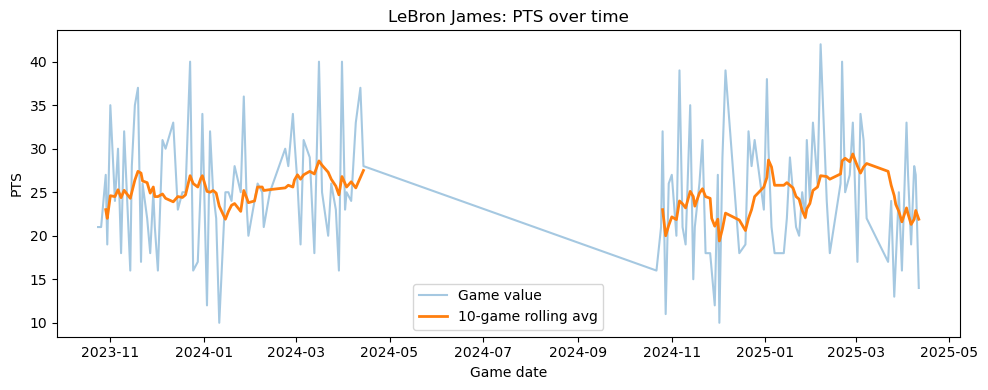

In [ ]:
player = "LeBron James"   #can always change this to look at different players just using LeBron as an example
metric = "pts"

df_raw = games[games["player_name"] == player].sort_values("game_date")
df_tr = trends[trends["player_name"] == player].sort_values("game_date")

plt.figure(figsize=(10, 4))
plt.plot(df_raw["game_date"], df_raw[metric], alpha=0.4, label="Game value")
plt.plot(df_tr["game_date"], df_tr[f"{metric}_roll10"], linewidth=2, label="10-game rolling avg")

plt.title(f"{player}: {metric.upper()} over time")
plt.xlabel("Game date")
plt.ylabel(metric.upper())
plt.legend()
plt.tight_layout()
plt.show()


## Comparing multiple players (season averages)

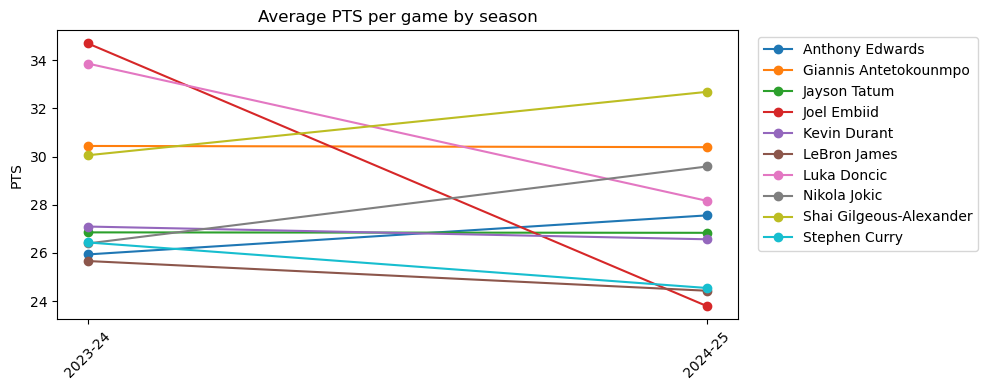

In [4]:
metric = "pts"

season_avgs = (
    games.groupby(["player_name", "season"])[metric]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 4))

for p in season_avgs["player_name"].unique():
    dfp = season_avgs[season_avgs["player_name"] == p]
    plt.plot(dfp["season"], dfp[metric], marker="o", label=p)

plt.title(f"Average {metric.upper()} per game by season")
plt.ylabel(metric.upper())
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Distribution of game-level performance
- Checking the distribution of game level points 

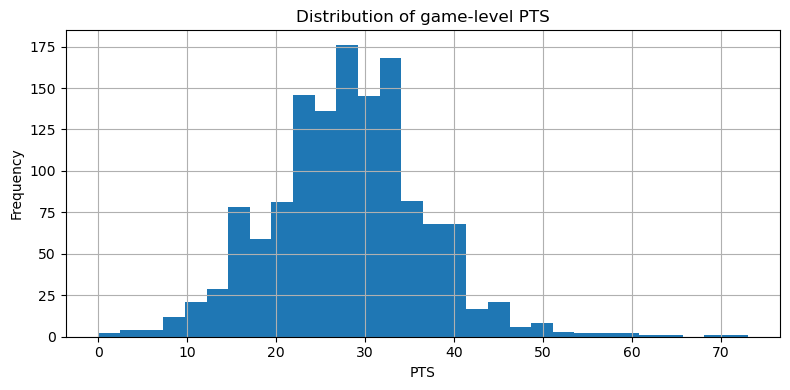

In [5]:
metric = "pts"

plt.figure(figsize=(8, 4))
games[metric].hist(bins=30)
plt.title(f"Distribution of game-level {metric.upper()}")
plt.xlabel(metric.upper())
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Season average vs average of last 10 games per player

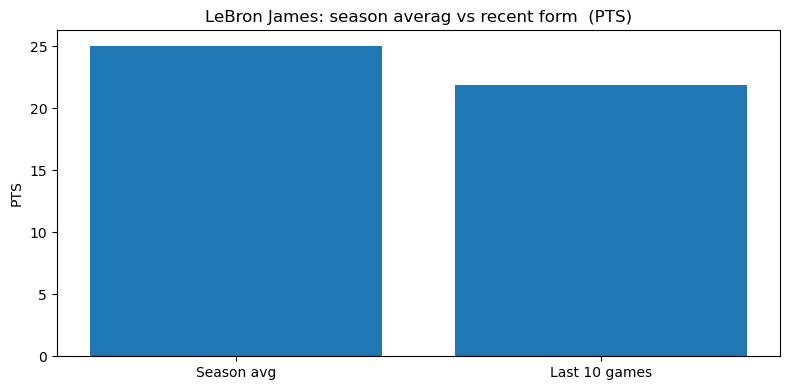

In [8]:
player = "LeBron James"   #can always change this to look at different players just using LeBron as an example
metric = "pts"

df = games[games["player_name"] == player].sort_values("game_date")

season_avg = df[metric].mean()
last10_avg = df.tail(10)[metric].mean()

plt.figure(figsize=(8, 4))
plt.bar(["Season avg", "Last 10 games"], [season_avg, last10_avg])
plt.title(f"{player}: season averag vs recent form  ({metric.upper()})")
plt.ylabel(metric.upper())
plt.tight_layout()
plt.show()


## Looking for correlation between any stats 

In [9]:
cols = [c for c in ["pts", "reb", "ast", "min"] if c in games.columns]
corr = games[cols].corr()

corr


,pts,reb,ast,min
pts,1.000000,0.196675,0.044633,0.403636
reb,0.196675,1.000000,0.282363,0.257663
ast,0.044633,0.282363,1.000000,0.214110
min,0.403636,0.257663,0.214110,1.000000
